In [28]:
import pandas as pd

df = pd.read_json("playerSessions.json")

df["duration_sec"] = df["duration"].str.replace(" seconds", "").astype(int)

df["date"] = pd.to_datetime(df["date"])

df.head()

,date,duration,jumps,score,obstaclesPassed,duration_sec
0,2025-05-09 23:53:50,11 seconds,5,0,0,11
1,2025-05-09 23:54:16,14 seconds,10,1,1,14
2,2025-05-09 23:55:19,67 seconds,40,10,12,67
3,2025-05-09 23:56:46,153 seconds,100,30,35,153
4,2025-05-10 13:12:26,20 seconds,8,1,2,20


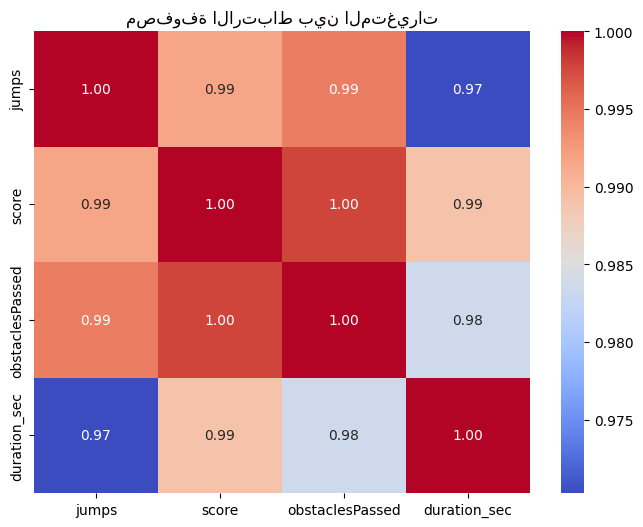

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("مصفوفة الارتباط بين المتغيرات")
plt.show()

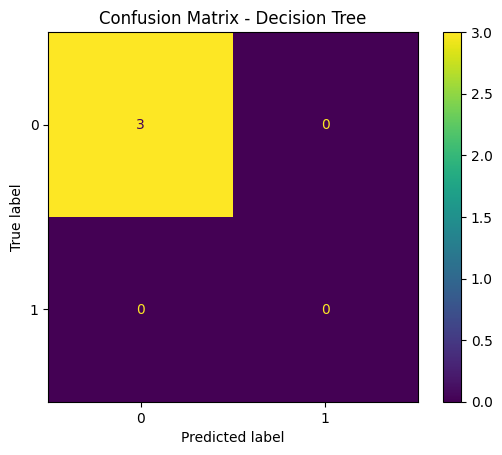

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # تأكد من تضمين كل التصنيفات

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [18]:
df.describe()

,date,jumps,score,obstaclesPassed,duration_sec
count,10,10.000000,10.000000,10.000000,10.000000
mean,2025-05-10 23:54:57.100000,48.200000,13.900000,15.600000,82.300000
min,2025-05-09 23:53:50,5.000000,0.000000,0.000000,11.000000
25%,2025-05-09 23:55:40.750000128,9.250000,1.250000,2.250000,20.000000
50%,2025-05-11 05:12:24,45.000000,11.000000,13.000000,63.000000
75%,2025-05-11 21:14:53.500000,77.500000,24.750000,26.750000,137.250000
max,2025-05-11 21:20:00,120.000000,40.000000,42.000000,209.000000
std,NaN,41.882906,14.247417,15.269432,73.744378


In [13]:
import pandas as pd

df = pd.read_json("playerSessions.json")
df["duration_sec"] = df["duration"].str.replace(" seconds", "").astype(int)
df["date"] = pd.to_datetime(df["date"])

df.describe()

,date,jumps,score,obstaclesPassed,duration_sec
count,10,10.000000,10.000000,10.000000,10.000000
mean,2025-05-10 23:54:57.100000,48.200000,13.900000,15.600000,82.300000
min,2025-05-09 23:53:50,5.000000,0.000000,0.000000,11.000000
25%,2025-05-09 23:55:40.750000128,9.250000,1.250000,2.250000,20.000000
50%,2025-05-11 05:12:24,45.000000,11.000000,13.000000,63.000000
75%,2025-05-11 21:14:53.500000,77.500000,24.750000,26.750000,137.250000
max,2025-05-11 21:20:00,120.000000,40.000000,42.000000,209.000000
std,NaN,41.882906,14.247417,15.269432,73.744378


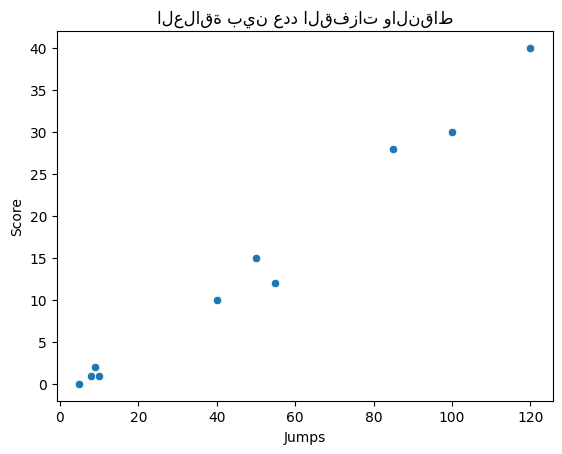

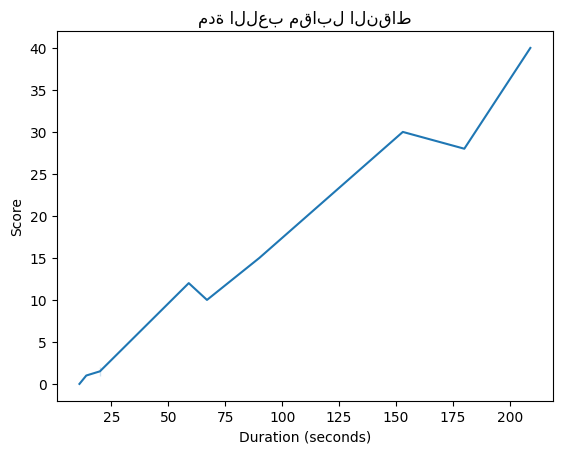

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="jumps", y="score")
plt.title("العلاقة بين عدد القفزات والنقاط")
plt.xlabel("Jumps")
plt.ylabel("Score")
plt.show()

sns.lineplot(data=df, x="duration_sec", y="score")
plt.title("مدة اللعب مقابل النقاط")
plt.xlabel("Duration (seconds)")
plt.ylabel("Score")
plt.show()

from sklearn.cluster import KMeans

features = df[["duration_sec", "jumps", "score"]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
df["cluster"] = kmeans.labels_

sns.scatterplot(data=df, x="jumps", y="score", hue="cluster", palette="Set2")
plt.title("تصنيف اللاعبين حسب الأداء")
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df["failed"] = df["score"] == 0

X = df[["duration_sec", "jumps", "obstaclesPassed"]]
y = df["failed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("الدقة:", model.score(X_test, y_test))

الدقة: 1.0


In [22]:
avg_duration_failures = df[df["failed"]]["duration_sec"].mean()

if avg_duration_failures > 30:
    print("🚨 اللاعبون الذين يخسرون غالبًا يلعبون لأكثر من 30 ثانية → أضف تلميحات أو تبسيط اللعب.")
else:
    print("✅ اللاعبون الذين يخسرون يخفقون بسرعة → قد تحتاج لتحفيزهم أو تبسيط المرحلة الأولى.")

✅ اللاعبون الذين يخسرون يخفقون بسرعة → قد تحتاج لتحفيزهم أو تبسيط المرحلة الأولى.


In [21]:
df.to_csv("final_player_analysis.csv", index=False)